In [1]:
# Fourier analysis is a method for expressing a function as a sum of periodic components,
# and for recovering the signal from those components. When both the function and
# its Fourier transform are replaced with discretized counterparts, it is called the discrete
# Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast 
# algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to 
# light in its current form by Cooley and Tukey [CT65]. Press et al. [NR07] 
# provide an accessible introduction to Fourier analysis and its applications.

In [1]:
from scipy.fftpack import fft, ifft
import numpy as np

In [2]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [3]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

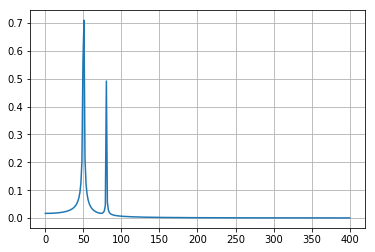

In [7]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
N=600
T=1.0/800.0
x=np.linspace(0.0, N*T, N)
y=np.sin(50.0 * 2.0*np.pi*x) +0.5*np.sin(80.0 * 2.0*np.pi*x)
yf=fft(y)
xf=np.linspace(0.0,1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

C:\Users\sklearn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


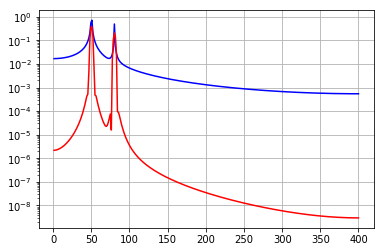

In [5]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy.signal import blackman
N=600
T=1.0/800.0
x=np.linspace(0.0, N*T, N)
y=np.sin(50.0 * 2.0*np.pi*x) +0.5*np.sin(80.0 * 2.0*np.pi*x)
yf=fft(y)
w=blackman(N)
ywf=fft(y*w)
xf=np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), 'b-')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), 'r-')
plt.grid()
plt.show()

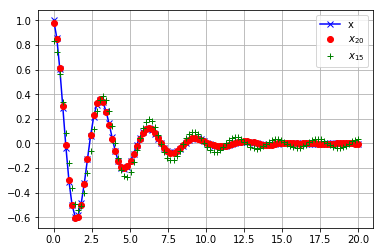

In [6]:
from scipy.fftpack import dct, idct
N=100
t=np.linspace(0,20,N)
x=np.exp(-t/3)*np.cos(2*t)
y= dct(x, norm='ortho')
window=np.zeros(N)
window[:20]=1
yr=idct(y*window, norm='ortho')
sum(abs(x-yr)**2)/sum(abs(x)**2)
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window=np.zeros(N)
window[:15]=1
yr=idct(y*window, norm='ortho')
sum(abs(x-yr)**2)/sum(abs(x)**2)
plt.plot(t, yr, 'g+')
plt.legend(['x','$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()